In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/llm-prompts-in-the-context-of-machine-learning/ML_Prompts.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/llm-prompts-in-the-context-of-machine-learning/ML_Prompts.csv', encoding='latin1')
df.head()

,the,to,of,for,in,you,on,model,based,how,...,productivity,contexts,aerospace,internet,things,video,disasters,blockchain,automate,label.1
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
df.columns

Index(['the', 'to', 'of', 'for', 'in', 'you', 'on', 'model', 'based', 'how',
       ...
       'productivity', 'contexts', 'aerospace', 'internet', 'things', 'video',
       'disasters', 'blockchain', 'automate', 'label.1'],
      dtype='object', length=1745)

In [5]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist()[:10])  # only show first 10 to avoid long output

Shape: (1600, 1745)

Columns:
 ['the', 'to', 'of', 'for', 'in', 'you', 'on', 'model', 'based', 'how']


In [6]:
# Check for missing values
df.isnull().sum().sum()

0

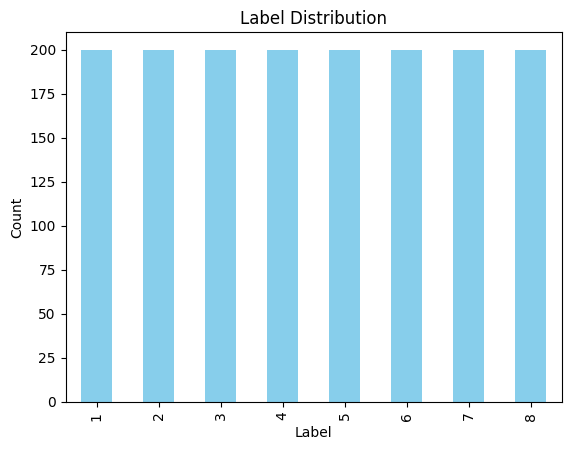

In [7]:
import matplotlib.pyplot as plt

# Plot value counts for the label
df['label.1'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [8]:
# Features = all columns except label
X = df.drop('label.1', axis=1)
y = df['label.1']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.990625

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
           2       0.94      1.00      0.97        48
           3       1.00      0.94      0.97        47
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00        44
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        34

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320

